# **Churn Prediction for Bank Customers**

-------------

## **Objective**

The objective of this project is to predict customer churn for a bank using various machine learning techniques. Churn prediction helps in identifying customers who are likely to leave the bank, allowing the bank to take proactive measures to retain them.

## **Data Source**

The dataset used for this project is `bank.csv`, which contains information about bank customers. This dataset includes features such as customer ID, age, geography, gender, balance, and whether or not the customer churned.

## **Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

## **Import Data**

In [13]:
# Load the dataset
df = pd.read_csv("bank.csv")
df.head()
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

## **Describe Data**

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## **Data Visualization**

<Axes: xlabel='Churn', ylabel='count'>

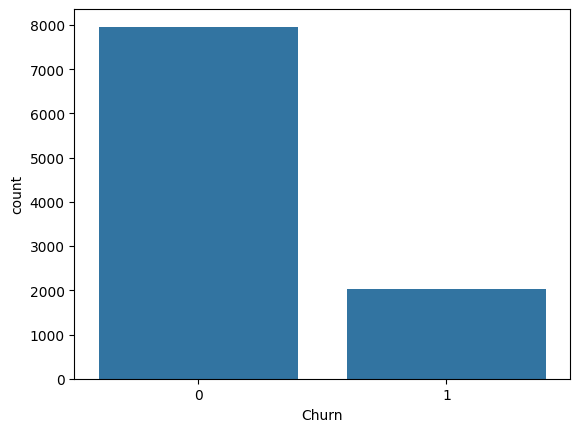

In [6]:
sns.countplot(x="Churn", data=df)

## **Data Preprocessing**

In [7]:
df = df.set_index("CustomerId")
df.replace({"Geography": {"France": 2, "Germany": 1, "Spain": 0}}, inplace=True)
df.replace({"Gender": {"Male": 2, "Female": 1}}, inplace=True)
df.replace({"NumOfProducts": {1: 0, 2: 1, 3: 1, 4: 1}}, inplace=True)
df["ZeroBalance"] = np.where(df["Balance"] > 0, 1, 0)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5724\4163785345.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Geography": {"France": 2, "Germany": 1, "Spain": 0}}, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5724\4163785345.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Gender": {"Male": 2, "Female": 1}}, inplace=True)


## **Define Target Variable (y) and Feature Variables (X)**

In [8]:
X = df.drop(["Surname", "Churn"], axis=1)
y = df["Churn"]

## **Train Test Split**

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2529)
x_rus, y_rus = RandomUnderSampler(random_state=2529).fit_resample(X, y)
x_ros, y_ros = RandomOverSampler(random_state=2529).fit_resample(X, y)
x_train_rus, x_test_rus, y_train_rus, y_test_rus = train_test_split(x_rus, y_rus, test_size=0.8, random_state=2529)
x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(x_ros, y_ros, test_size=0.8, random_state=2529)

## **Modeling**

In [16]:
# Modeling
# Standardizing the features
sc = StandardScaler()
x_train[["CreditScore", "Age", "Tenure", "Balance", "Estimated Salary"]] = sc.fit_transform(x_train[["CreditScore", "Age", "Tenure", "Balance", "Estimated Salary"]])
x_test[["CreditScore", "Age", "Tenure", "Balance", "Estimated Salary"]] = sc.transform(x_test[["CreditScore", "Age", "Tenure", "Balance", "Estimated Salary"]])
x_train_rus[["CreditScore", "Age", "Tenure", "Balance", "Estimated Salary"]] = sc.fit_transform(x_train_rus[["CreditScore", "Age", "Tenure", "Balance", "Estimated Salary"]])
x_test_rus[["CreditScore", "Age", "Tenure", "Balance", "Estimated Salary"]] = sc.transform(x_test_rus[["CreditScore", "Age", "Tenure", "Balance", "Estimated Salary"]])
x_train_ros[["CreditScore", "Age", "Tenure", "Balance", "Estimated Salary"]] = sc.fit_transform(x_train_ros[["CreditScore", "Age", "Tenure", "Balance", "Estimated Salary"]])
x_test_ros[["CreditScore", "Age", "Tenure", "Balance", "Estimated Salary"]] = sc.transform(x_test_ros[["CreditScore", "Age", "Tenure", "Balance", "Estimated Salary"]])

# SVC Model
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

## **Model Evaluation**

In [17]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1579   24]
 [ 274  123]]
0.851
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1603
           1       0.84      0.31      0.45       397

    accuracy                           0.85      2000
   macro avg       0.84      0.65      0.68      2000
weighted avg       0.85      0.85      0.82      2000



## **Prediction**

In [19]:
# Hyperparameter Tuning
param_grid = {
    "C": [0.1, 1, 10],
    "gamma": [1, 0.1, 0.01],
    "kernel": ["rbf"],
    "class_weight": ["balanced"]
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid.fit(x_train, y_train)
grid_predictions = grid.predict(x_test)

confusion_matrix(y_test, grid_predictions)
classification_report(y_test, grid_predictions)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s


KeyboardInterrupt: 

## **Explaination**

This project aims to predict customer churn using the SVM model with hyperparameter tuning. Data preprocessing includes handling categorical data, creating new features, and standardizing the data. Random undersampling and oversampling techniques were also applied to handle class imbalance.